### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [3]:
# Load the dataset
file_path = './nih_labels.csv'  # Change this to your file path
data = pd.read_csv(file_path)

# Data Cleaning
data['Patient Age'] = pd.to_numeric(data['Patient Age'].str.extract('(\d+)')[0], errors='coerce')

data

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Cardiomegaly,Emphysema,Effusion,Hernia,...,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,fold
0,00000001_000.png,0,1,58,M,PA,1,0,0,0,...,0,0,0,0,0,0,0,0,0,train
1,00000001_001.png,1,1,58,M,PA,1,1,0,0,...,0,0,0,0,0,0,0,0,0,train
2,00000001_002.png,2,1,58,M,PA,1,0,1,0,...,0,0,0,0,0,0,0,0,0,train
3,00000002_000.png,0,2,81,M,PA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,00000003_000.png,0,3,81,F,PA,0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,1,30801,39,M,PA,0,0,0,0,...,1,0,0,0,0,1,0,0,0,train
112116,00030802_000.png,0,30802,29,M,PA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,val
112117,00030803_000.png,0,30803,42,F,PA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
112118,00030804_000.png,0,30804,30,F,PA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train


In [4]:
data["View Position"].unique()

array(['PA', 'AP'], dtype=object)

### Statistical Summary

In [5]:
print(data.describe())

         Follow-up #     Patient ID    Patient Age   Cardiomegaly  \
count  112120.000000  112120.000000  112120.000000  112120.000000   
mean        8.573751   14346.381743      46.901463       0.024759   
std        15.406320    8403.876972      16.839923       0.155391   
min         0.000000       1.000000       1.000000       0.000000   
25%         0.000000    7310.750000      35.000000       0.000000   
50%         3.000000   13993.000000      49.000000       0.000000   
75%        10.000000   20673.000000      59.000000       0.000000   
max       183.000000   30805.000000     414.000000       1.000000   

           Emphysema       Effusion         Hernia   Infiltration  \
count  112120.000000  112120.000000  112120.000000  112120.000000   
mean        0.022440       0.118775       0.002025       0.177435   
std         0.148111       0.323524       0.044950       0.382038   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

### Distribution of Patient Age

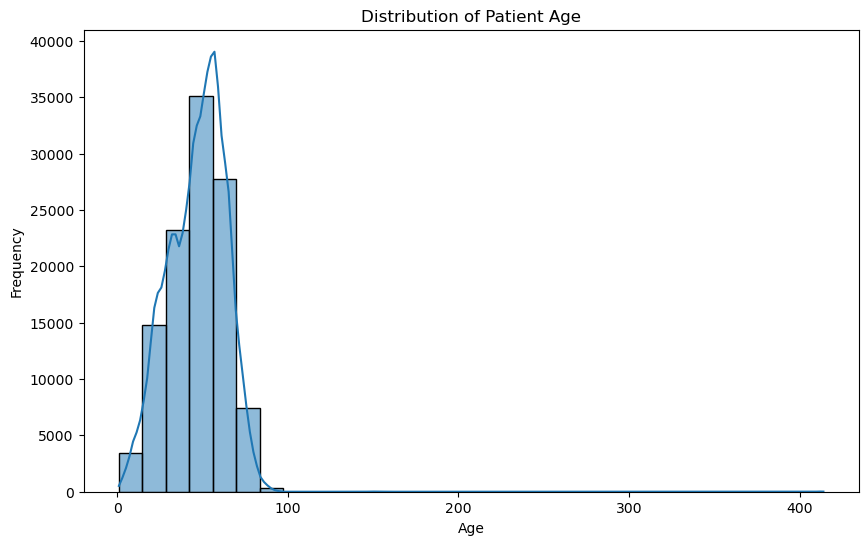

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Patient Age'], bins=30, kde=True)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Distribution of Patient Gender

In [7]:
print(data['Patient Gender'].value_counts())

Patient Gender
M    63340
F    48780
Name: count, dtype: int64


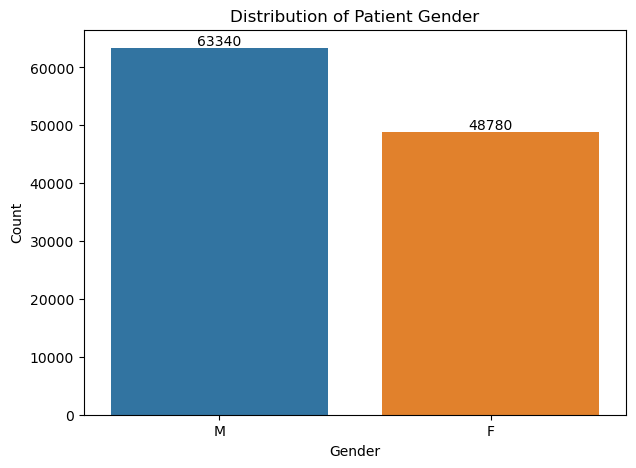

In [8]:
# Countplot of Patient Gender
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x='Patient Gender')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Patient Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Distribution of View Position

In [9]:
print(data['View Position'].value_counts())

View Position
PA    67310
AP    44810
Name: count, dtype: int64


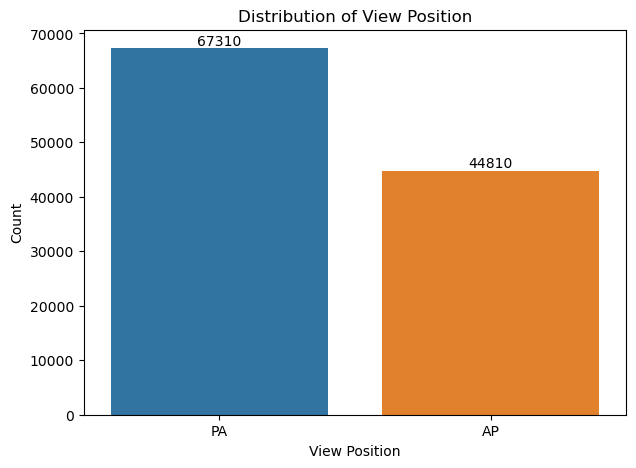

In [10]:
# Visualization of Distribution of View Position
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x='View Position')
ax.bar_label(ax.containers[0])
plt.title('Distribution of View Position')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.show()

### Analysis of Findings

In [12]:
# Calculate the occurrence of each label
label_occurrences = data.iloc[:, 6:-1].sum().sort_values(ascending=False)

label_occurrences


Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
dtype: int64

In [13]:
# Calculate the total occurrences across all labels
total_occurrences = label_occurrences.sum()

total_occurrences


81176

In [15]:
# Total number of rows in the dataset
total_rows = data.shape[0]

# Count of images with multiple labels
multiple_labels_count = (data.iloc[:, 6:-1].sum(axis=1) > 1).sum()

# Count of images with no labels
no_labels_count = (data.iloc[:, 6:-1].sum(axis=1) == 0).sum()

total_rows, multiple_labels_count, no_labels_count


(112120, 20796, 60361)

In [17]:
# Number of unique findings
print(label_occurrences.nunique())
# 14 pathologies

14


### Calculating the number of unique patients for each view position

In [19]:
# Calculating the total number of unique patients in the dataset
total_unique_patients = data['Patient ID'].nunique()
total_unique_patients

30805

In [20]:

# Unique patients for 'AP' view position
unique_patients_AP = data[data['View Position'] == 'AP']['Patient ID'].nunique()

# Unique patients for 'PA' view position
unique_patients_PA = data[data['View Position'] == 'PA']['Patient ID'].nunique()

unique_patients_AP, unique_patients_PA

(9060, 28868)

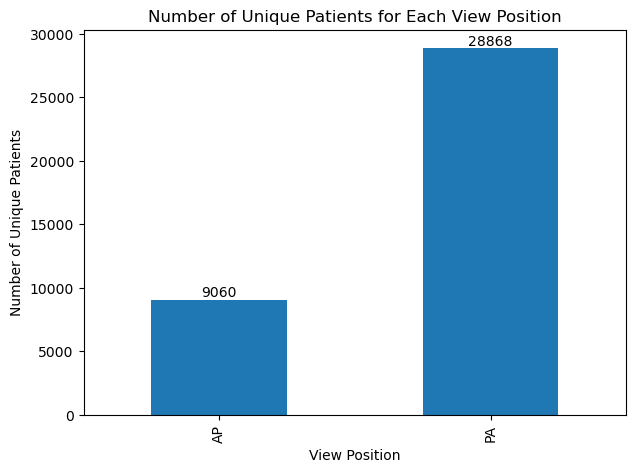

In [21]:
# Visualization of Unique Patients for AP and PA View Positions

unique_patients = {'AP': unique_patients_AP, 'PA': unique_patients_PA}
unique_patients_series = pd.Series(unique_patients)

plt.figure(figsize=(7, 5))
ax = unique_patients_series.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Number of Unique Patients for Each View Position')
plt.xlabel('View Position')
plt.ylabel('Number of Unique Patients')
plt.show()


---